In [11]:
'''Get the Credibility of next parameter/Credibility of current parameter ratio from \
un-normalised posterior'''
'''Many steps are redundant but better for explanation'''
import numpy as np
seed_step_coin1_parameter = 0
seed_step_coin2_parameter = 0
head1 = 10
tail1=30
head2 = 10
tail2=30
posterior1_current= 4.38176888e-30
posterior2_current= 4.38176888e-30
a1,b1,a2,b2=3,3,1,2
coin1_parameter =[]
coin2_parameter =[]
count=0
while len(coin1_parameter) <= 50000:
    seed_step_coin1_parameter = np.random.uniform(0, 1, 1)
    seed_step_coin2_parameter = np.random.uniform(0, 1, 1)
    if seed_step_coin1_parameter > 0 and seed_step_coin2_parameter > 0 and \
    seed_step_coin1_parameter <=1 and seed_step_coin2_parameter <=1:
        p1=seed_step_coin1_parameter
        p2=seed_step_coin2_parameter
        unnormalised_bernoulli_likelihoood_coin1 = p1 **(head1) * (1-p1)**(tail1)
        unnormalised_bernoulli_likelihoood_coin2 = p2 **(head2) * (1-p2)**(tail2)
        unormalised_beta_prior_coin1 = p1 **(a1-1) * (1-p1)**(b1-1)
        unormalised_beta_prior_coin2 = p2 **(a2-1) * (1-p2)**(b2-1)
        posterior1_proposed= unnormalised_bernoulli_likelihoood_coin1 * unormalised_beta_prior_coin1
        posterior2_proposed= unnormalised_bernoulli_likelihoood_coin2 * unormalised_beta_prior_coin2
        if min(posterior1_proposed/posterior1_current,1) == 1:
            coin1_parameter.append(p1)
            posterior1_current = posterior1_proposed
        elif posterior1_proposed/posterior1_current > np.random.uniform(0,1,1):
            coin1_parameter.append(p1)
            posterior1_current = posterior1_proposed
        else:
            coin1_parameter.append(coin1_parameter[-1])
        if min(posterior2_proposed/posterior2_current,1) == 1:
            coin2_parameter.append(p2)
            posterior2_current = posterior2_proposed
        elif posterior2_proposed/posterior2_current > np.random.uniform(0,1,1):
            coin2_parameter.append(p2)
            posterior1_current = posterior1_proposed
        else:
            coin2_parameter.append(coin2_parameter[-1])
print('done')

done


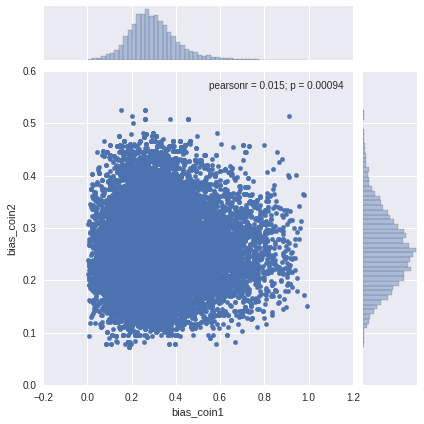

In [12]:
import pandas as pd
%matplotlib inline
import seaborn as sns
df = pd.DataFrame(coin1_parameter, columns = ['bias_coin1'])
df['bias_coin2'] = pd.DataFrame(coin2_parameter)
sns.jointplot(x="bias_coin1", y="bias_coin2", data=df)

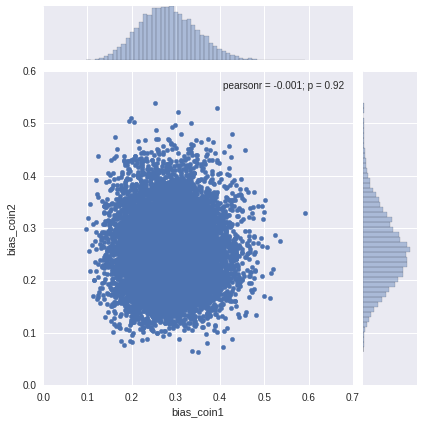

In [14]:
'''Verifying Analytically'''
posterior_distirbution = pd.DataFrame(np.random.beta(13,33, 10000),columns =['bias_coin1'])
posterior_distirbution['bias_coin2'] = pd.DataFrame(np.random.beta(11,32, 10000),)
sns.jointplot(x="bias_coin1", y="bias_coin2", data=posterior_distirbution)